# Import Libraries & dataset

In [13]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np


In [14]:
data  = pd.read_csv("../Data/featured_dataset.csv")

In [15]:
data.columns


Index(['Company', 'Product', 'TypeName', 'Inches', 'CPU_Frequency (GHz)',
       'RAM (GB)', 'Memory Type', 'Memory Capacity', 'GPU_Company', 'GPU_Type',
       'OpSys', 'Weight (kg)', 'Price (SAR)', 'Resolution_Width',
       'Resolution_Height', 'Contains_HD', 'Contains_IPS',
       'Contains_Touchscreen', 'Contains_4K', 'Contains_Quad_HD_plus',
       'CPU_Family', 'CPU_Generation', 'CPU_Series', 'GPU_Family',
       'GPU_Series', 'GPU_Series_Clean', 'Series_Type', 'Performance_Tier'],
      dtype='object')

# Data encoding and Standardization


In [16]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = data.select_dtypes(include=np.number).columns

if 'Price (SAR)' in numerical_cols:
    numerical_cols = numerical_cols.drop('Price (SAR)')

scaler = MinMaxScaler()

data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

data.sample(10)

,Company,Product,TypeName,Inches,CPU_Frequency (GHz),RAM (GB),Memory Type,Memory Capacity,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (SAR),Resolution_Width,Resolution_Height,Contains_HD,Contains_IPS,Contains_Touchscreen,Contains_4K,Contains_Quad_HD_plus,CPU_Family,CPU_Generation,CPU_Series,GPU_Family,GPU_Series,GPU_Series_Clean,Series_Type,Performance_Tier
489,Asus,Zenbook UX390UA,Ultrabook,0.289157,0.666667,0.225806,SSD,0.197492,Intel,HD Graphics 620,Windows 10,0.054863,7741.5000,0.223929,0.224138,1.0,0.0,0.0,0.0,0.0,Core,7,i7,HD,620,0.100520,Numeric,Mid-Range
1186,Dell,Inspiron 5578,2 in 1 Convertible,0.662651,0.666667,0.225806,SSD,0.197492,Intel,HD Graphics 620,Windows 10,0.349127,4680.6300,0.223929,0.224138,1.0,0.0,1.0,0.0,0.0,Core,7,i7,HD,620,0.100520,Numeric,Mid-Range
639,Dell,XPS 15,Notebook,0.662651,0.703704,0.225806,SSD,0.398119,Nvidia,GeForce GTX 1050,Windows 10,0.341646,9524.0300,1.000000,1.000000,1.0,0.0,1.0,1.0,0.0,Core,7,i7,GeForce,1050,0.170462,Numeric,High-End
669,Acer,Aspire 3,Notebook,0.662651,0.407407,0.032258,SSD,0.047022,Intel,HD Graphics 520,Linux,0.351621,1635.6400,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,Core,6,i3,HD,520,0.084255,Numeric,Mid-Range
337,HP,Elitebook 850,Notebook,0.662651,0.592593,0.096774,SSD,0.097179,Intel,HD Graphics 620,Windows 10,0.286783,4541.6800,0.223929,0.224138,1.0,0.0,0.0,0.0,0.0,Core,7,i5,HD,620,0.100520,Numeric,Mid-Range
138,Lenovo,IdeaPad 320-15IKBN,Notebook,0.662651,0.592593,0.032258,HDD,0.398119,Nvidia,GeForce 920MX,No OS,0.376559,1981.0300,0.223929,0.224138,1.0,0.0,0.0,0.0,0.0,Core,7,i5,GeForce,920MX,0.149317,Alphanumeric,High-End
1126,Lenovo,Yoga Book,2 in 1 Convertible,0.000000,0.200000,0.032258,Flash,0.021944,Intel,HD Graphics 400,Windows 10,0.000000,1901.6300,0.223929,0.310345,0.0,1.0,1.0,0.0,0.0,Atom,8,Other,HD,400,0.064736,Numeric,Low-End
372,Asus,Rog Strix,Gaming,0.867470,0.777778,0.225806,SSD+HDD,0.498433,AMD,Radeon RX 580,Windows 10,0.638404,8730.0300,0.223929,0.224138,1.0,1.0,0.0,0.0,0.0,Ryzen,1,700,Radeon,580,0.094014,Numeric,Mid-Range
828,Acer,Chromebook 11,Netbook,0.180723,0.259259,0.032258,Flash,0.009404,Intel,HD Graphics 400,Chrome OS,0.164589,1409.3500,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,Celeron,3,Other,HD,400,0.064736,Numeric,Low-End
226,Dell,Inspiron 5567,Notebook,0.662651,0.666667,0.225806,HDD,0.398119,AMD,Radeon R7 M445,Windows 10,0.401496,3410.2697,0.223929,0.224138,1.0,0.0,1.0,0.0,0.0,Core,7,i7,Radeon,M445,0.072056,Alphanumeric,Low-End


In [17]:
data.drop(['Product'], axis=1, inplace=True)

for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [18]:
pd.set_option('display.max_columns', None)
data.sample(10)

,Company,TypeName,Inches,CPU_Frequency (GHz),RAM (GB),Memory Type,Memory Capacity,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (SAR),Resolution_Width,Resolution_Height,Contains_HD,Contains_IPS,Contains_Touchscreen,Contains_4K,Contains_Quad_HD_plus,CPU_Family,CPU_Generation,CPU_Series,GPU_Family,GPU_Series,GPU_Series_Clean,Series_Type,Performance_Tier
510,4,4,0.385542,0.592593,0.096774,5,0.047022,2,52,5,0.149626,3569.0300,0.223929,0.224138,1.0,1.0,1.0,0.0,0.0,7,4,17,4,27,0.100520,1,2
110,2,4,0.662651,0.333333,0.225806,6,0.498433,3,37,5,0.201995,5010.1400,0.223929,0.224138,1.0,0.0,0.0,0.0,0.0,7,5,18,2,73,0.024073,0,1
359,4,3,0.469880,0.629630,0.096774,5,0.097179,2,52,5,0.167082,5665.1900,0.223929,0.224138,1.0,0.0,0.0,0.0,0.0,7,4,17,4,27,0.100520,1,2
584,4,2,0.180723,0.259259,0.032258,0,0.003135,2,40,1,0.142145,1171.1500,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,6,1,15,4,9,0.064736,1,1
281,4,3,0.662651,0.407407,0.032258,2,0.398119,0,91,2,0.389027,1699.1600,0.223929,0.224138,1.0,0.0,0.0,0.0,0.0,7,3,16,10,62,0.069616,0,1
232,10,1,0.662651,0.703704,0.225806,6,0.498433,3,18,5,0.625935,5951.0300,0.223929,0.224138,1.0,1.0,0.0,0.0,0.0,7,4,18,2,3,0.172088,1,0
382,2,1,0.662651,0.703704,0.096774,6,0.448276,3,18,5,0.401496,6570.3500,0.223929,0.224138,1.0,1.0,0.0,0.0,0.0,7,4,18,2,3,0.172088,1,0
156,10,0,0.469880,0.555556,0.032258,5,0.097179,2,52,5,0.261845,2497.1300,0.223929,0.224138,1.0,1.0,1.0,0.0,0.0,7,4,16,4,27,0.100520,1,2
877,18,4,0.385542,0.518519,0.096774,5,0.097179,3,11,5,0.147132,3711.9500,0.223929,0.224138,1.0,1.0,0.0,0.0,0.0,7,3,17,2,37,0.152570,0,0
818,4,1,0.867470,0.703704,0.225806,6,0.448276,3,18,5,0.915212,9944.9294,0.223929,0.224138,1.0,1.0,0.0,0.0,0.0,7,4,18,2,3,0.172088,1,0


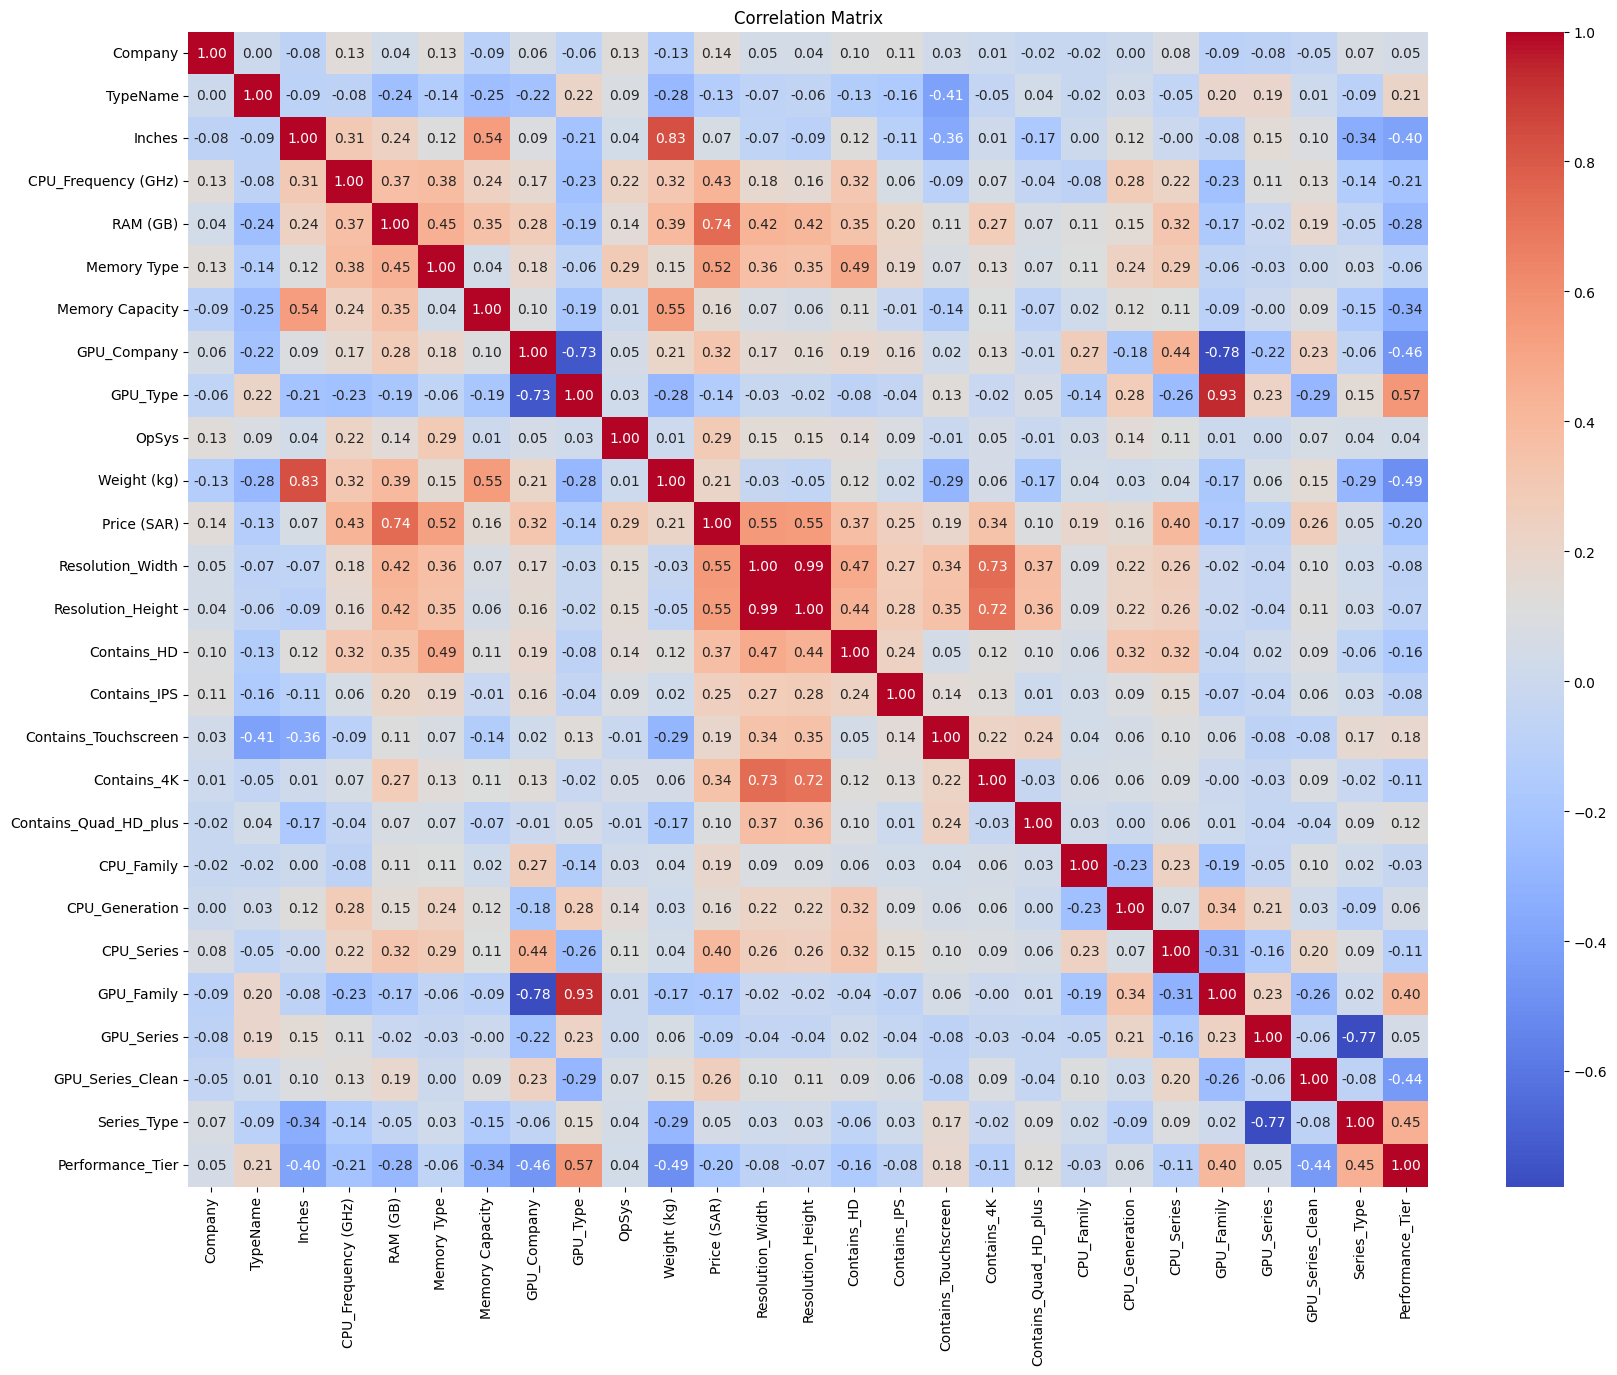

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Model Training & Evaluation


## Decision Tree Regressor Model

In [20]:
data.columns

Index(['Company', 'TypeName', 'Inches', 'CPU_Frequency (GHz)', 'RAM (GB)',
       'Memory Type', 'Memory Capacity', 'GPU_Company', 'GPU_Type', 'OpSys',
       'Weight (kg)', 'Price (SAR)', 'Resolution_Width', 'Resolution_Height',
       'Contains_HD', 'Contains_IPS', 'Contains_Touchscreen', 'Contains_4K',
       'Contains_Quad_HD_plus', 'CPU_Family', 'CPU_Generation', 'CPU_Series',
       'GPU_Family', 'GPU_Series', 'GPU_Series_Clean', 'Series_Type',
       'Performance_Tier'],
      dtype='object')

In [30]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

X = data.drop(['Price (SAR)','Resolution_Width', 'Resolution_Height','GPU_Company'], axis=1)
y = data['Price (SAR)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"DT Mean Squared Error (MSE): {mse}")
print(f"DT Mean Absolute Error (MAE): {mae}")
print(f"DT Root MSE: {rmse}")
print(f"DT R² Score: {r2}")

DT Mean Squared Error (MSE): 1386216.5464368104
DT Mean Absolute Error (MAE): 817.8540174509803
DT Root MSE: 1177.3769771983866
DT R² Score: 0.8227968559540285


In [31]:
from sklearn.ensemble import RandomForestRegressor

X = data.drop(['Price (SAR)','Resolution_Width', 'Resolution_Height','GPU_Company'], axis=1)
y = data['Price (SAR)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest - Root MSE: {rmse_rf}")
print(f"Random Forest - R² Score: {r2_rf}")

Random Forest - Mean Squared Error (MSE): 1000835.7152885705
Random Forest - Mean Absolute Error (MAE): 685.4119437640711
Random Forest - Root MSE: 1000.4177703782408
Random Forest - R² Score: 0.8720609446781569



# Save model

In [ ]:
# import joblib

# joblib.dump(model, 'decision_tree_model.pkl')
# print("Model saved to decision_tree_model.pkl")
# joblib.dump(scaler, 'scaler.pkl')
# print("Scaler saved to scaler.pkl")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   int64  
 1   TypeName             1275 non-null   int64  
 2   Inches               1275 non-null   float64
 3   ScreenResolution     1275 non-null   int64  
 4   CPU_Company          1275 non-null   int64  
 5   CPU_Type             1275 non-null   int64  
 6   CPU_Frequency (GHz)  1275 non-null   float64
 7   RAM (GB)             1275 non-null   float64
 8   Memory Type          1275 non-null   int64  
 9   Memory Capacity      1275 non-null   float64
 10  GPU_Company          1275 non-null   int64  
 11  GPU_Type             1275 non-null   int64  
 12  OpSys                1275 non-null   int64  
 13  Weight (kg)          1275 non-null   float64
 14  Price (SAR)          1275 non-null   float64
dtypes: float64(6), int64(9)
memory usage: 

# Insight

A comparison of the Decision Tree (DT) and Random Forest (RF) models :

| **Metric**              | **Decision Tree (DT)**         | **Random Forest (RF)**         |
|-------------------------|--------------------------------|--------------------------------|
| **Mean Squared Error (MSE)** | 1,386,216.55                   | **1,000,835.72**                  |
| **Mean Absolute Error (MAE)** | 817.85                         | **685.41**                         |
| **Root Mean Squared Error (RMSE)** | 1,177.38                      | **1,000.42**                       |
| **R² Score**            | 0.8228                         | **0.8721**                         |

This table clearly shows that the **Random Forest (RF)** model outperforms the **Decision Tree (DT)** across all evaluation metrics, including MSE, MAE, RMSE, and R² score.